# Visualization of inversion - Kimberlite data

In [48]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

In [49]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [50]:
mypath = 'data/flightlines_grid_1600pts_16km/amf_inversion/inc50_dec-15_r700_int6_z00_dz220/'

In [51]:
with open(mypath+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [52]:
with open('data/model.pickle') as w:
        model = pickle.load(w)

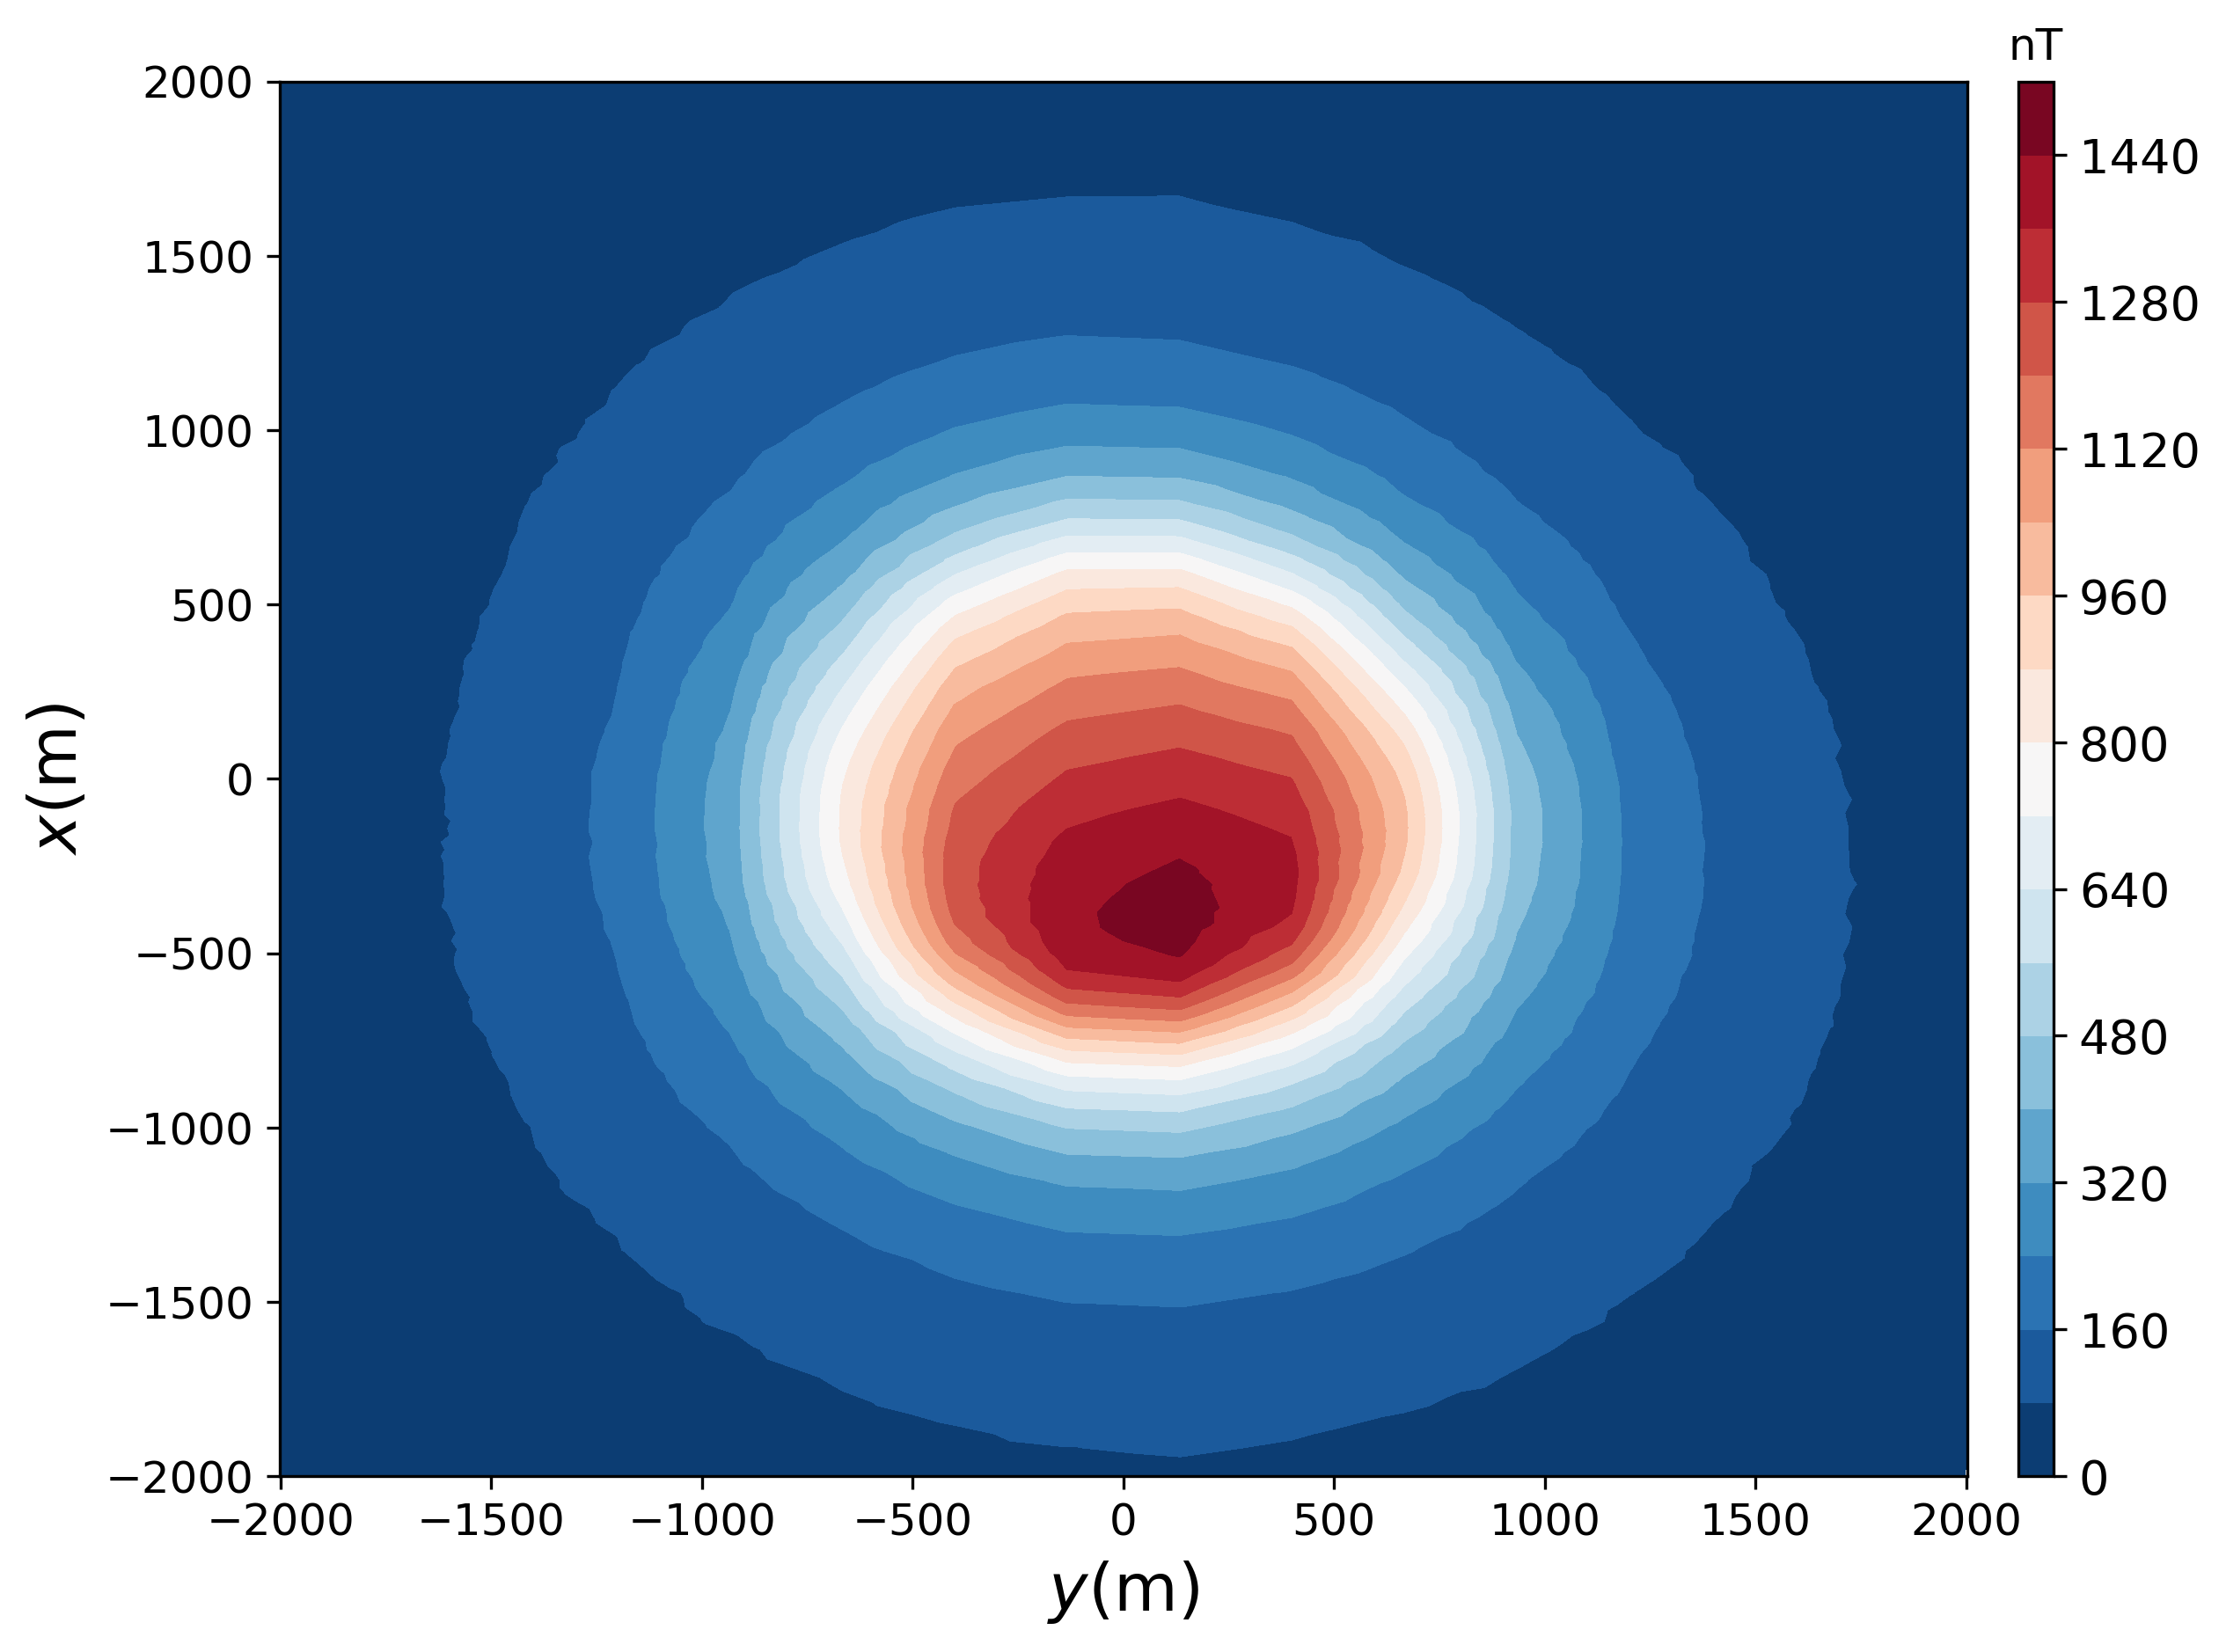

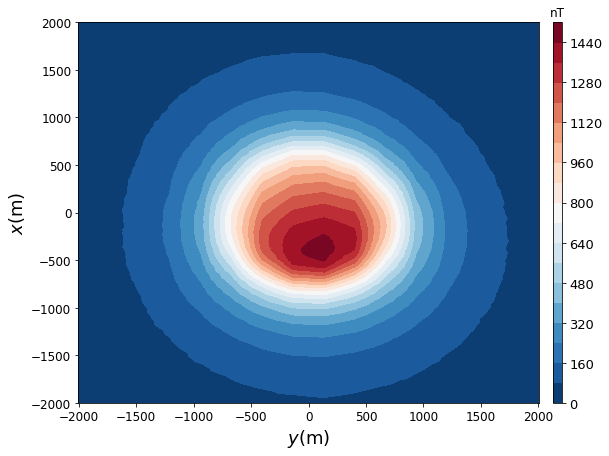

In [53]:
plt.figure(figsize=(10,7))
#plt.title('Observed AMF', fontsize=20)
#norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
#plt.plot(inversion['y'], inversion['x'], 'ko', markersize=1.)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#clines = plt.tricontour(inversion['y'], inversion['x'], inversion['observed_data'], 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
#mpl.m2km()
#plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'kimberlite_real_data.png', dpi=300, bbox_inches="tight")
#plt.show()
img(filename=mypath+'kimberlite_real_data.png', width=1000, height=1200)

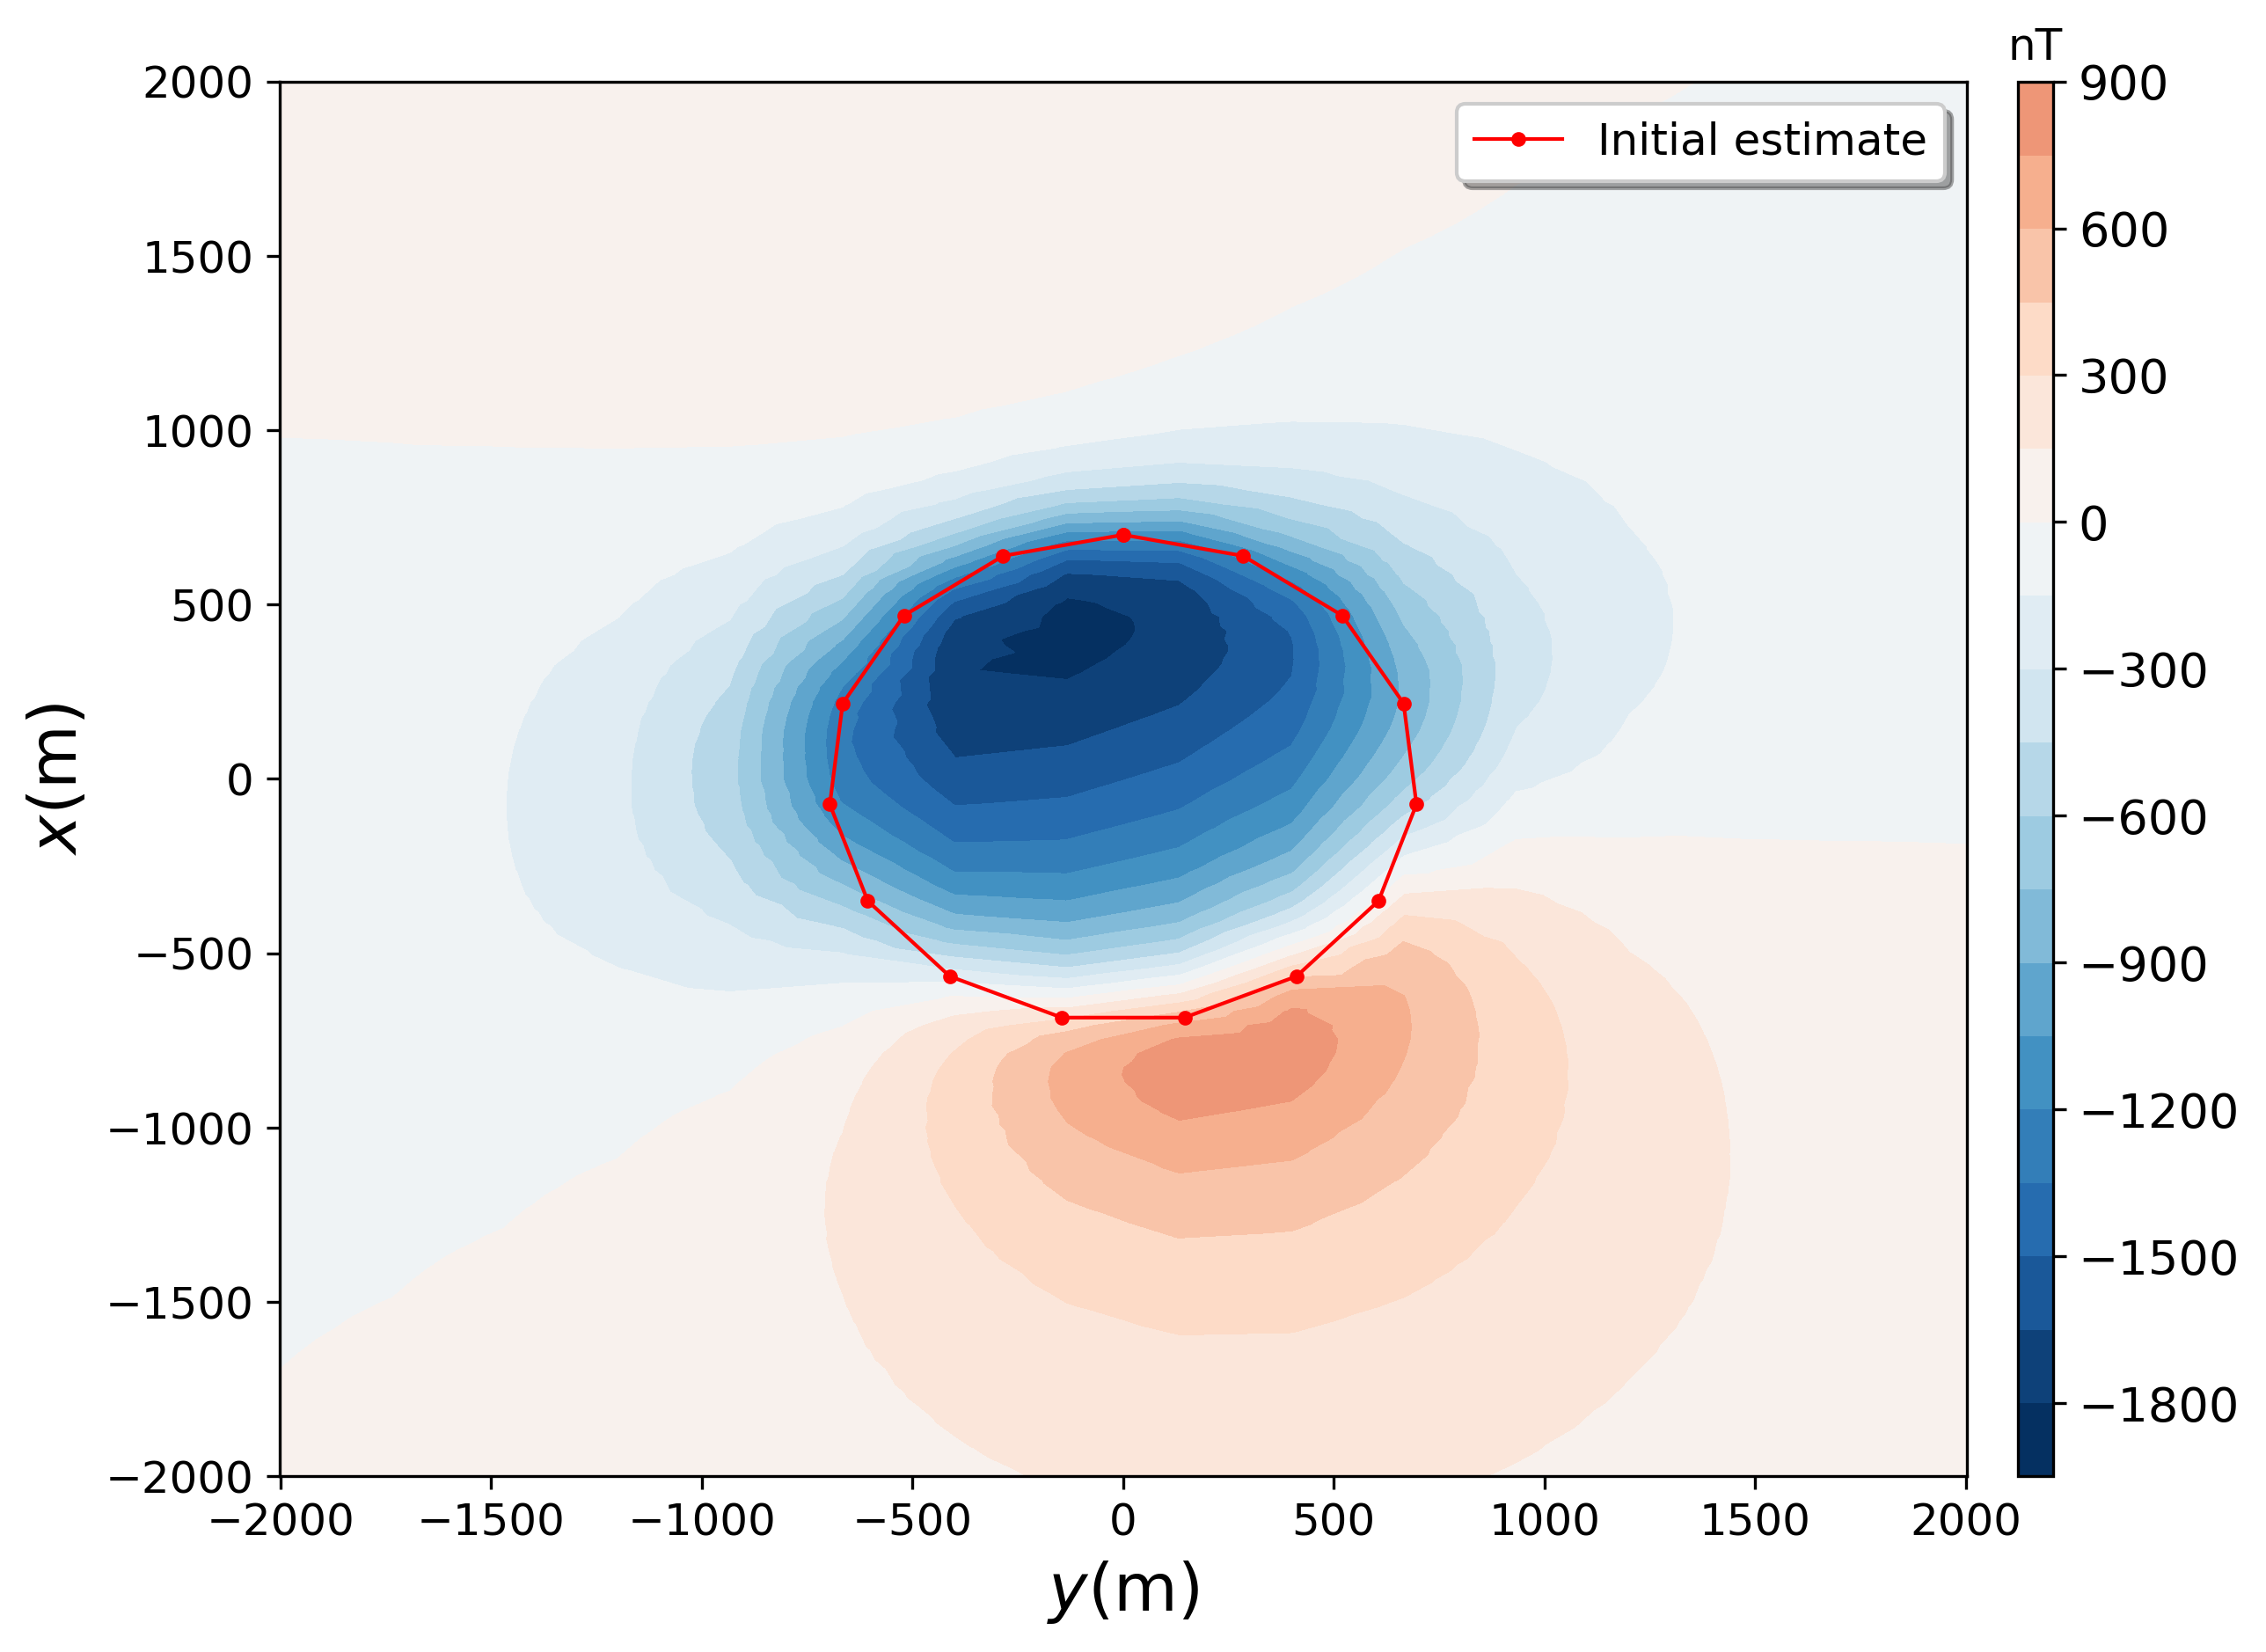

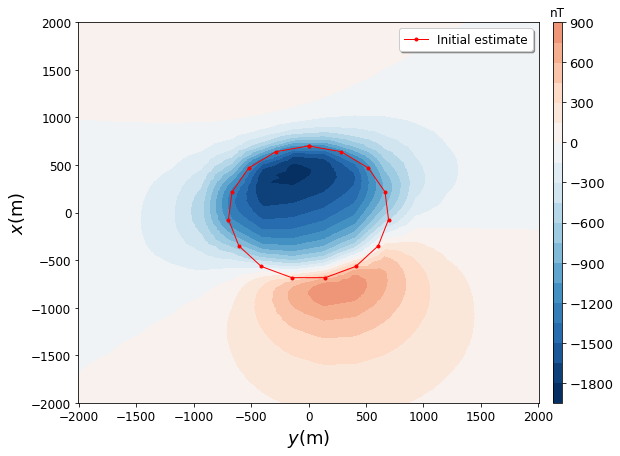

In [54]:
plt.figure(figsize=(10,7))
#plt.title('Predict AMF', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['initial_data']), vmax=np.min(inversion['initial_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['initial_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(inversion['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
#mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_amf_pred_data_true_inital.png', dpi=300, bbox_inches="tight")
#plt.show()

img(filename=mypath+'kimberlite_amf_pred_data_true_inital.png', width=1000, height=1200)

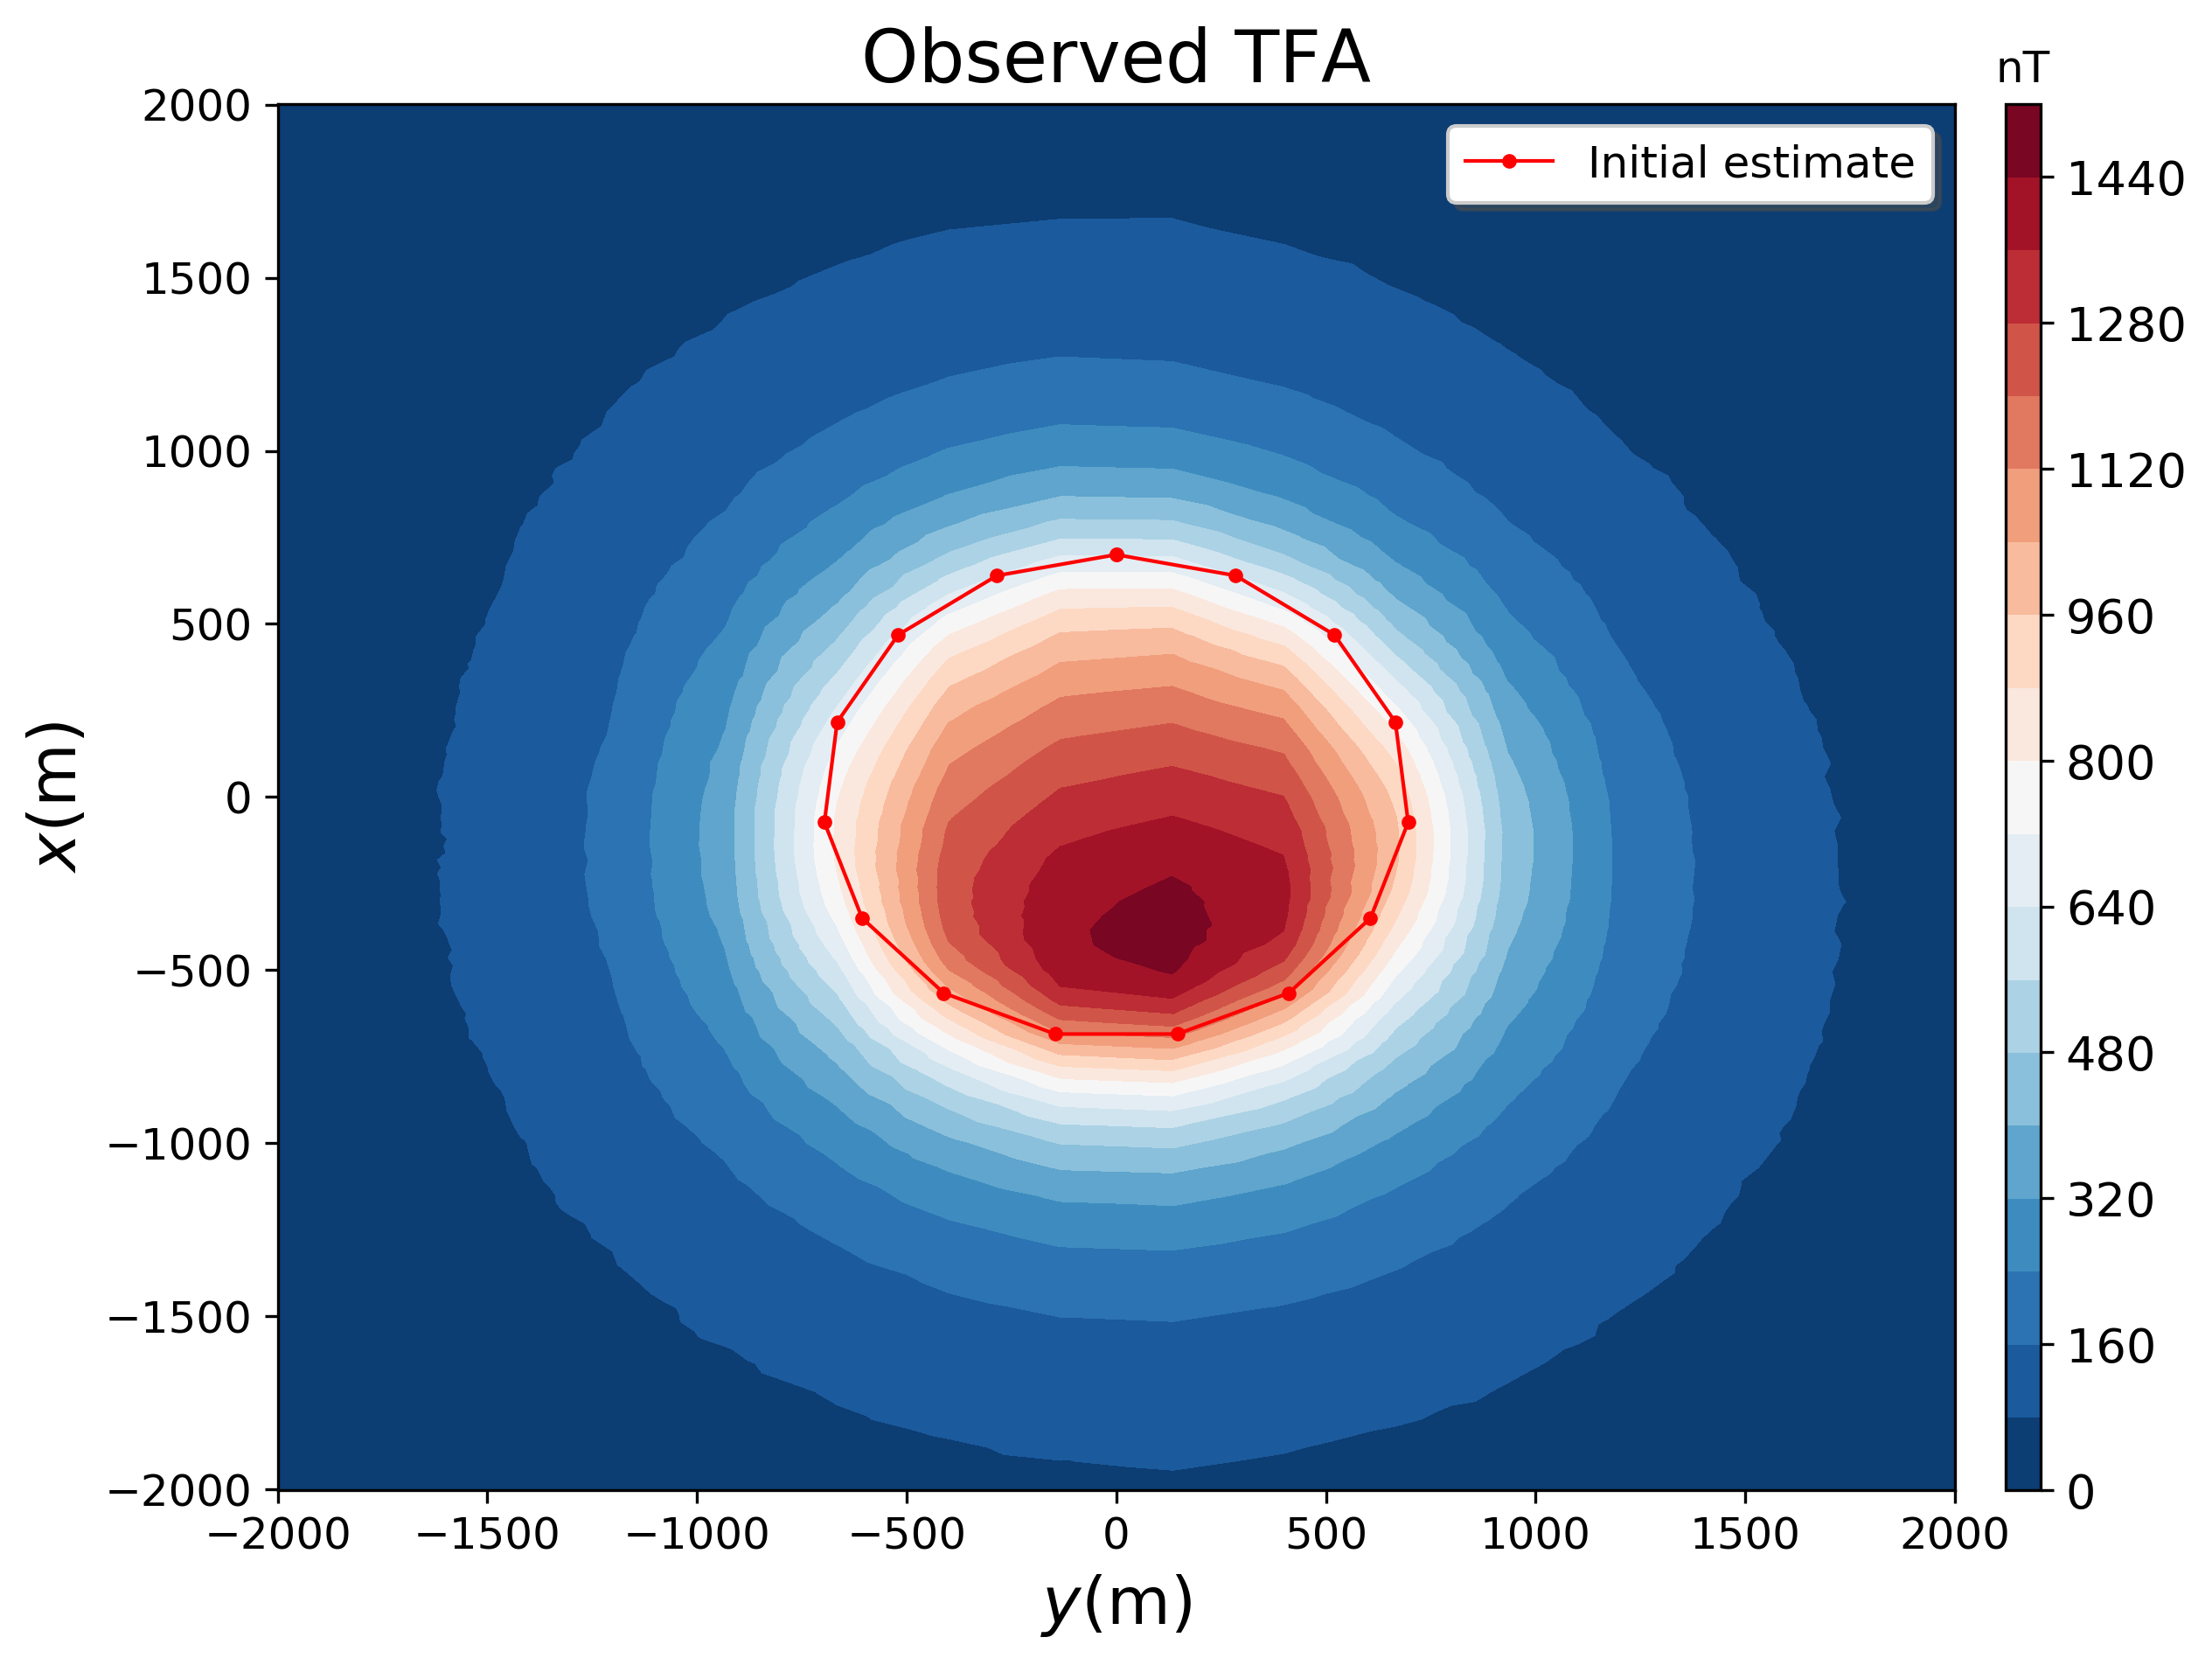

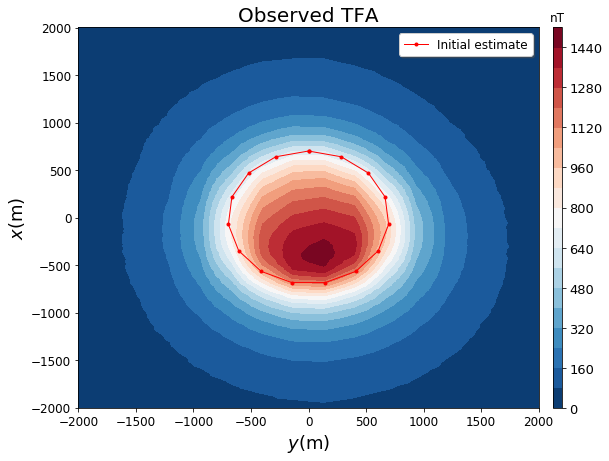

In [55]:
plt.figure(figsize=(10,7))
plt.title('Observed TFA', fontsize=20)
#norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(inversion['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
#mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_amf_obs_data_true_inital.png', dpi=300, bbox_inches="tight")
#plt.show()

img(filename=mypath+'kimberlite_amf_obs_data_true_inital.png', width=1000, height=1200)

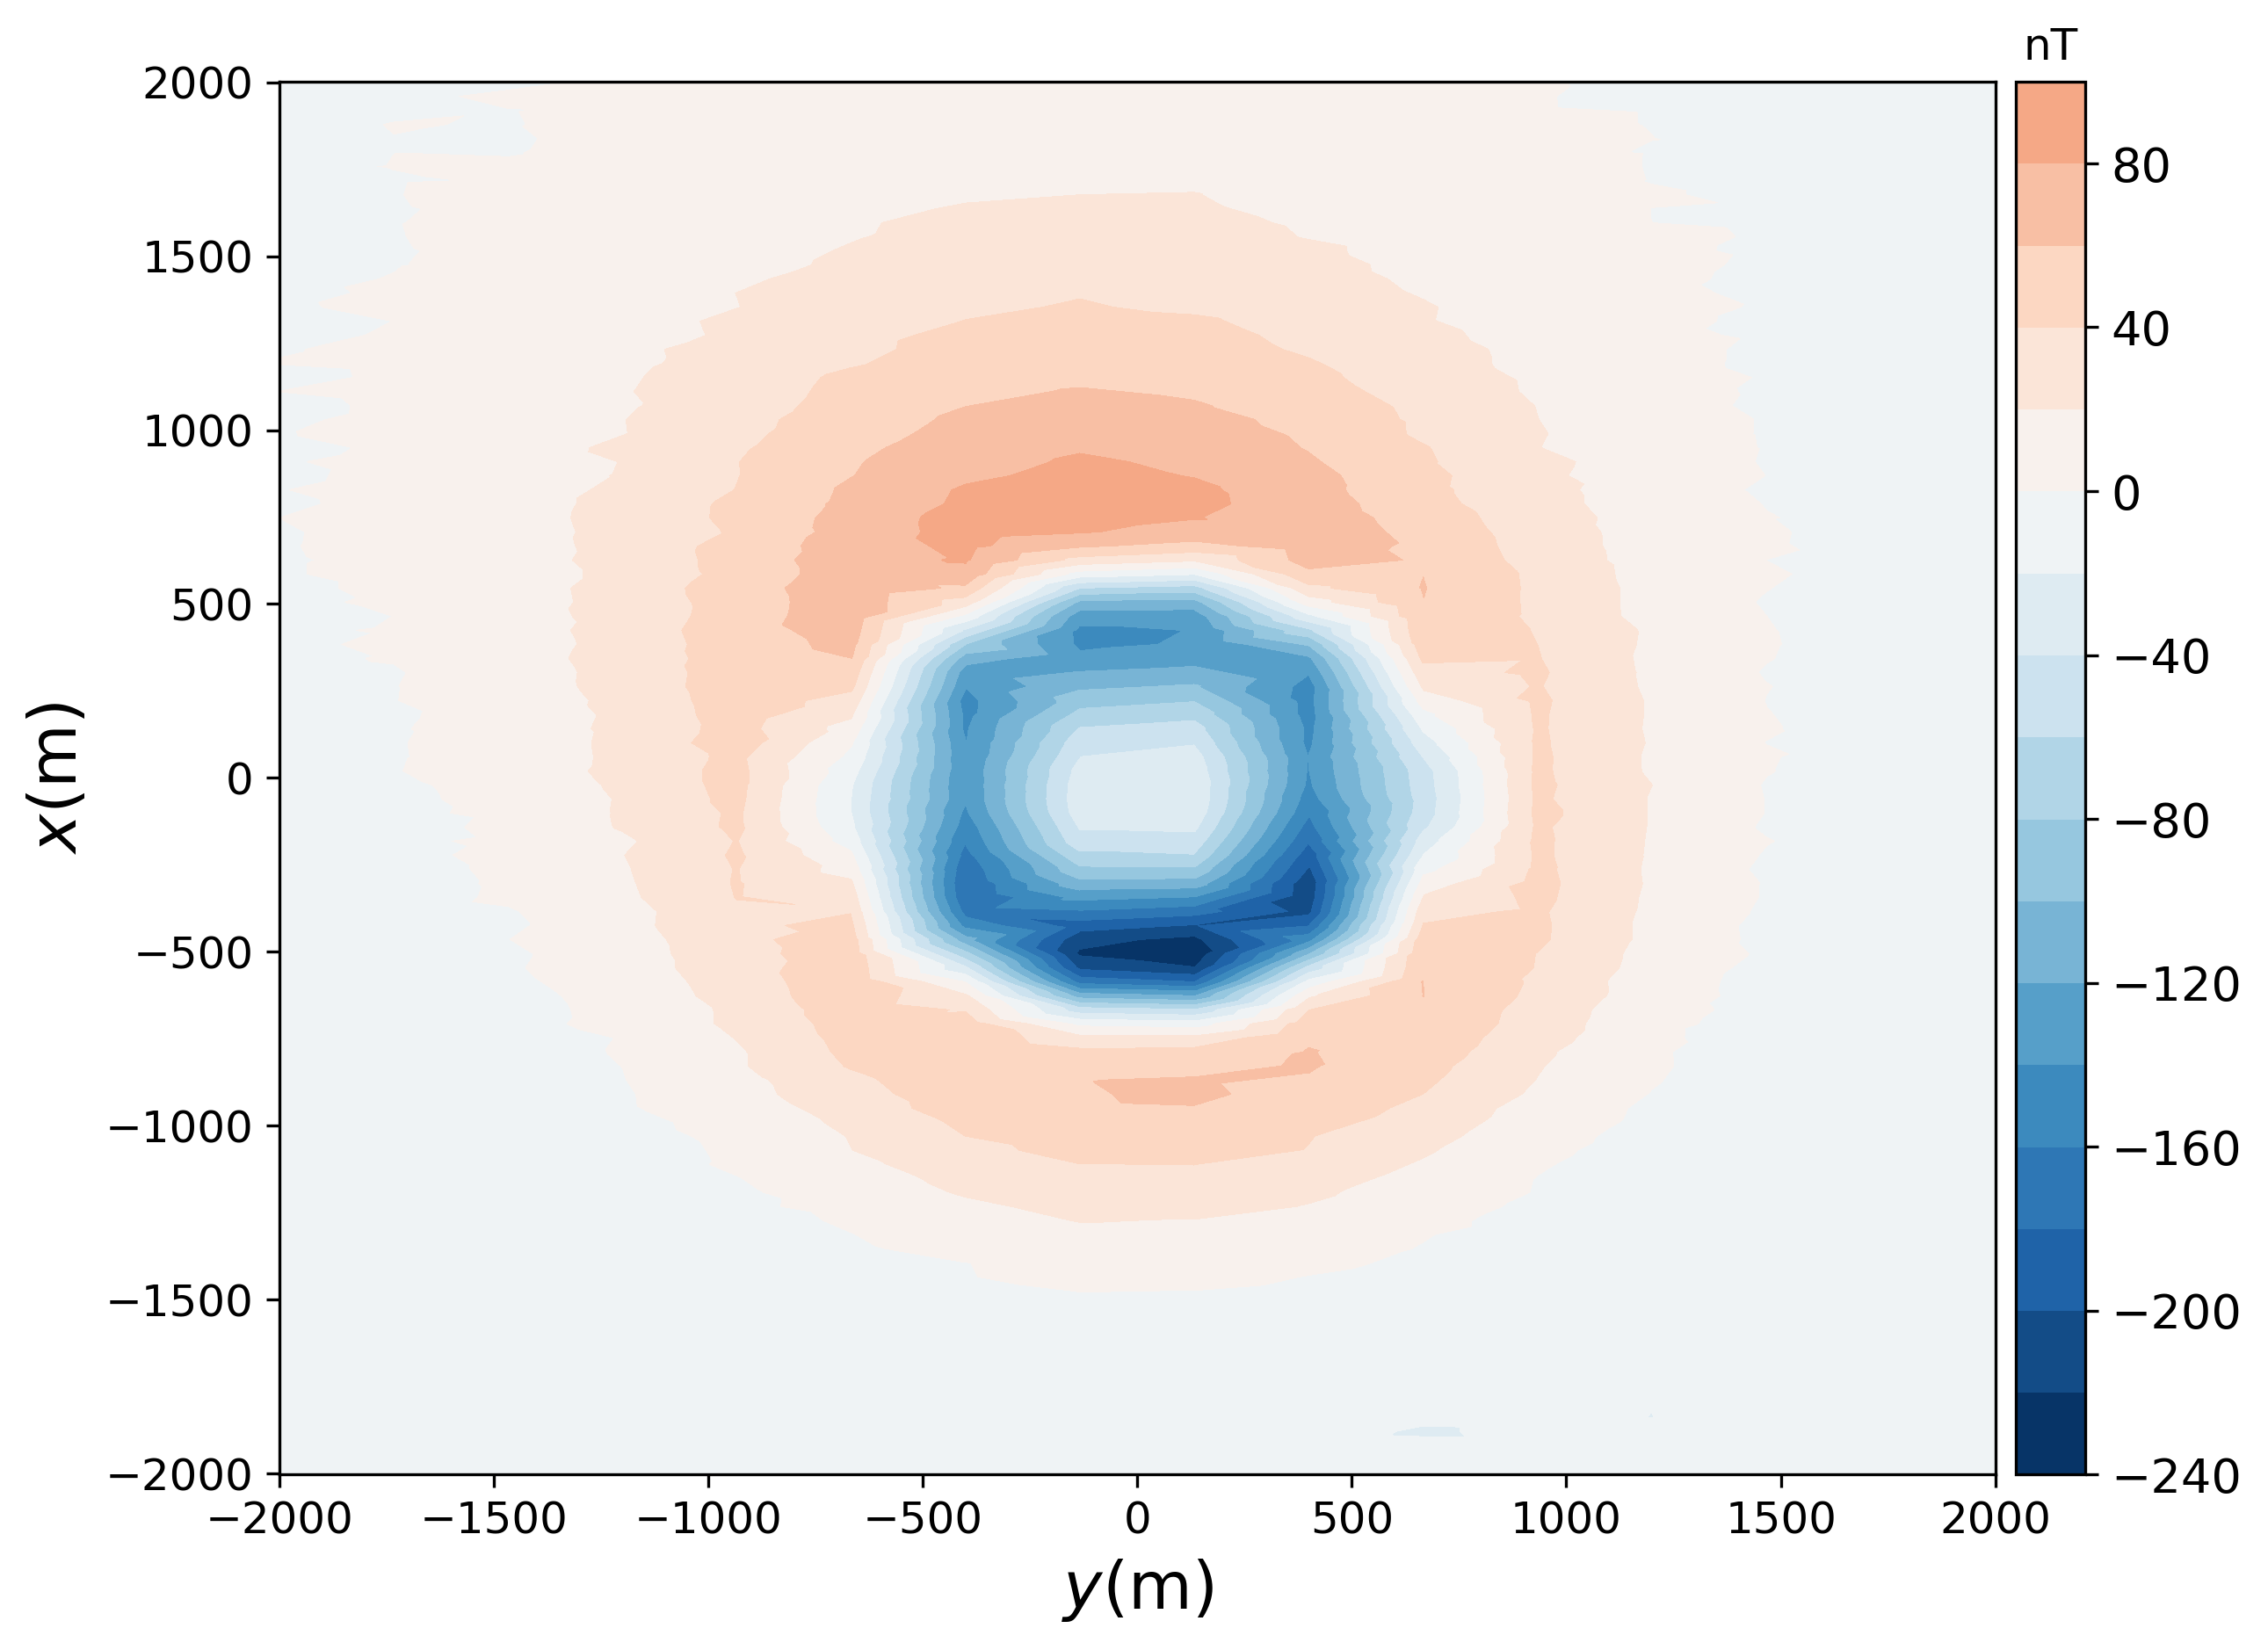

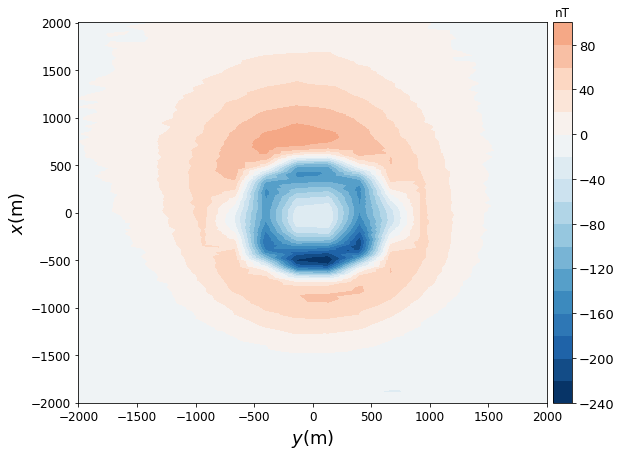

In [56]:
plt.figure(figsize=(10,7))
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'] - inversion['data_fit'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
#mpl.m2km()
plt.savefig(mypath+'kimberlite_amf_residual.png', dpi=300, bbox_inches="tight")
#plt.show()
img(filename=mypath+'kimberlite_amf_residual.png', width=1600, height=400)

In [57]:
inversion['observed_data'].shape

(1600,)

In [58]:
inversion['data_fit'].shape

(1600,)

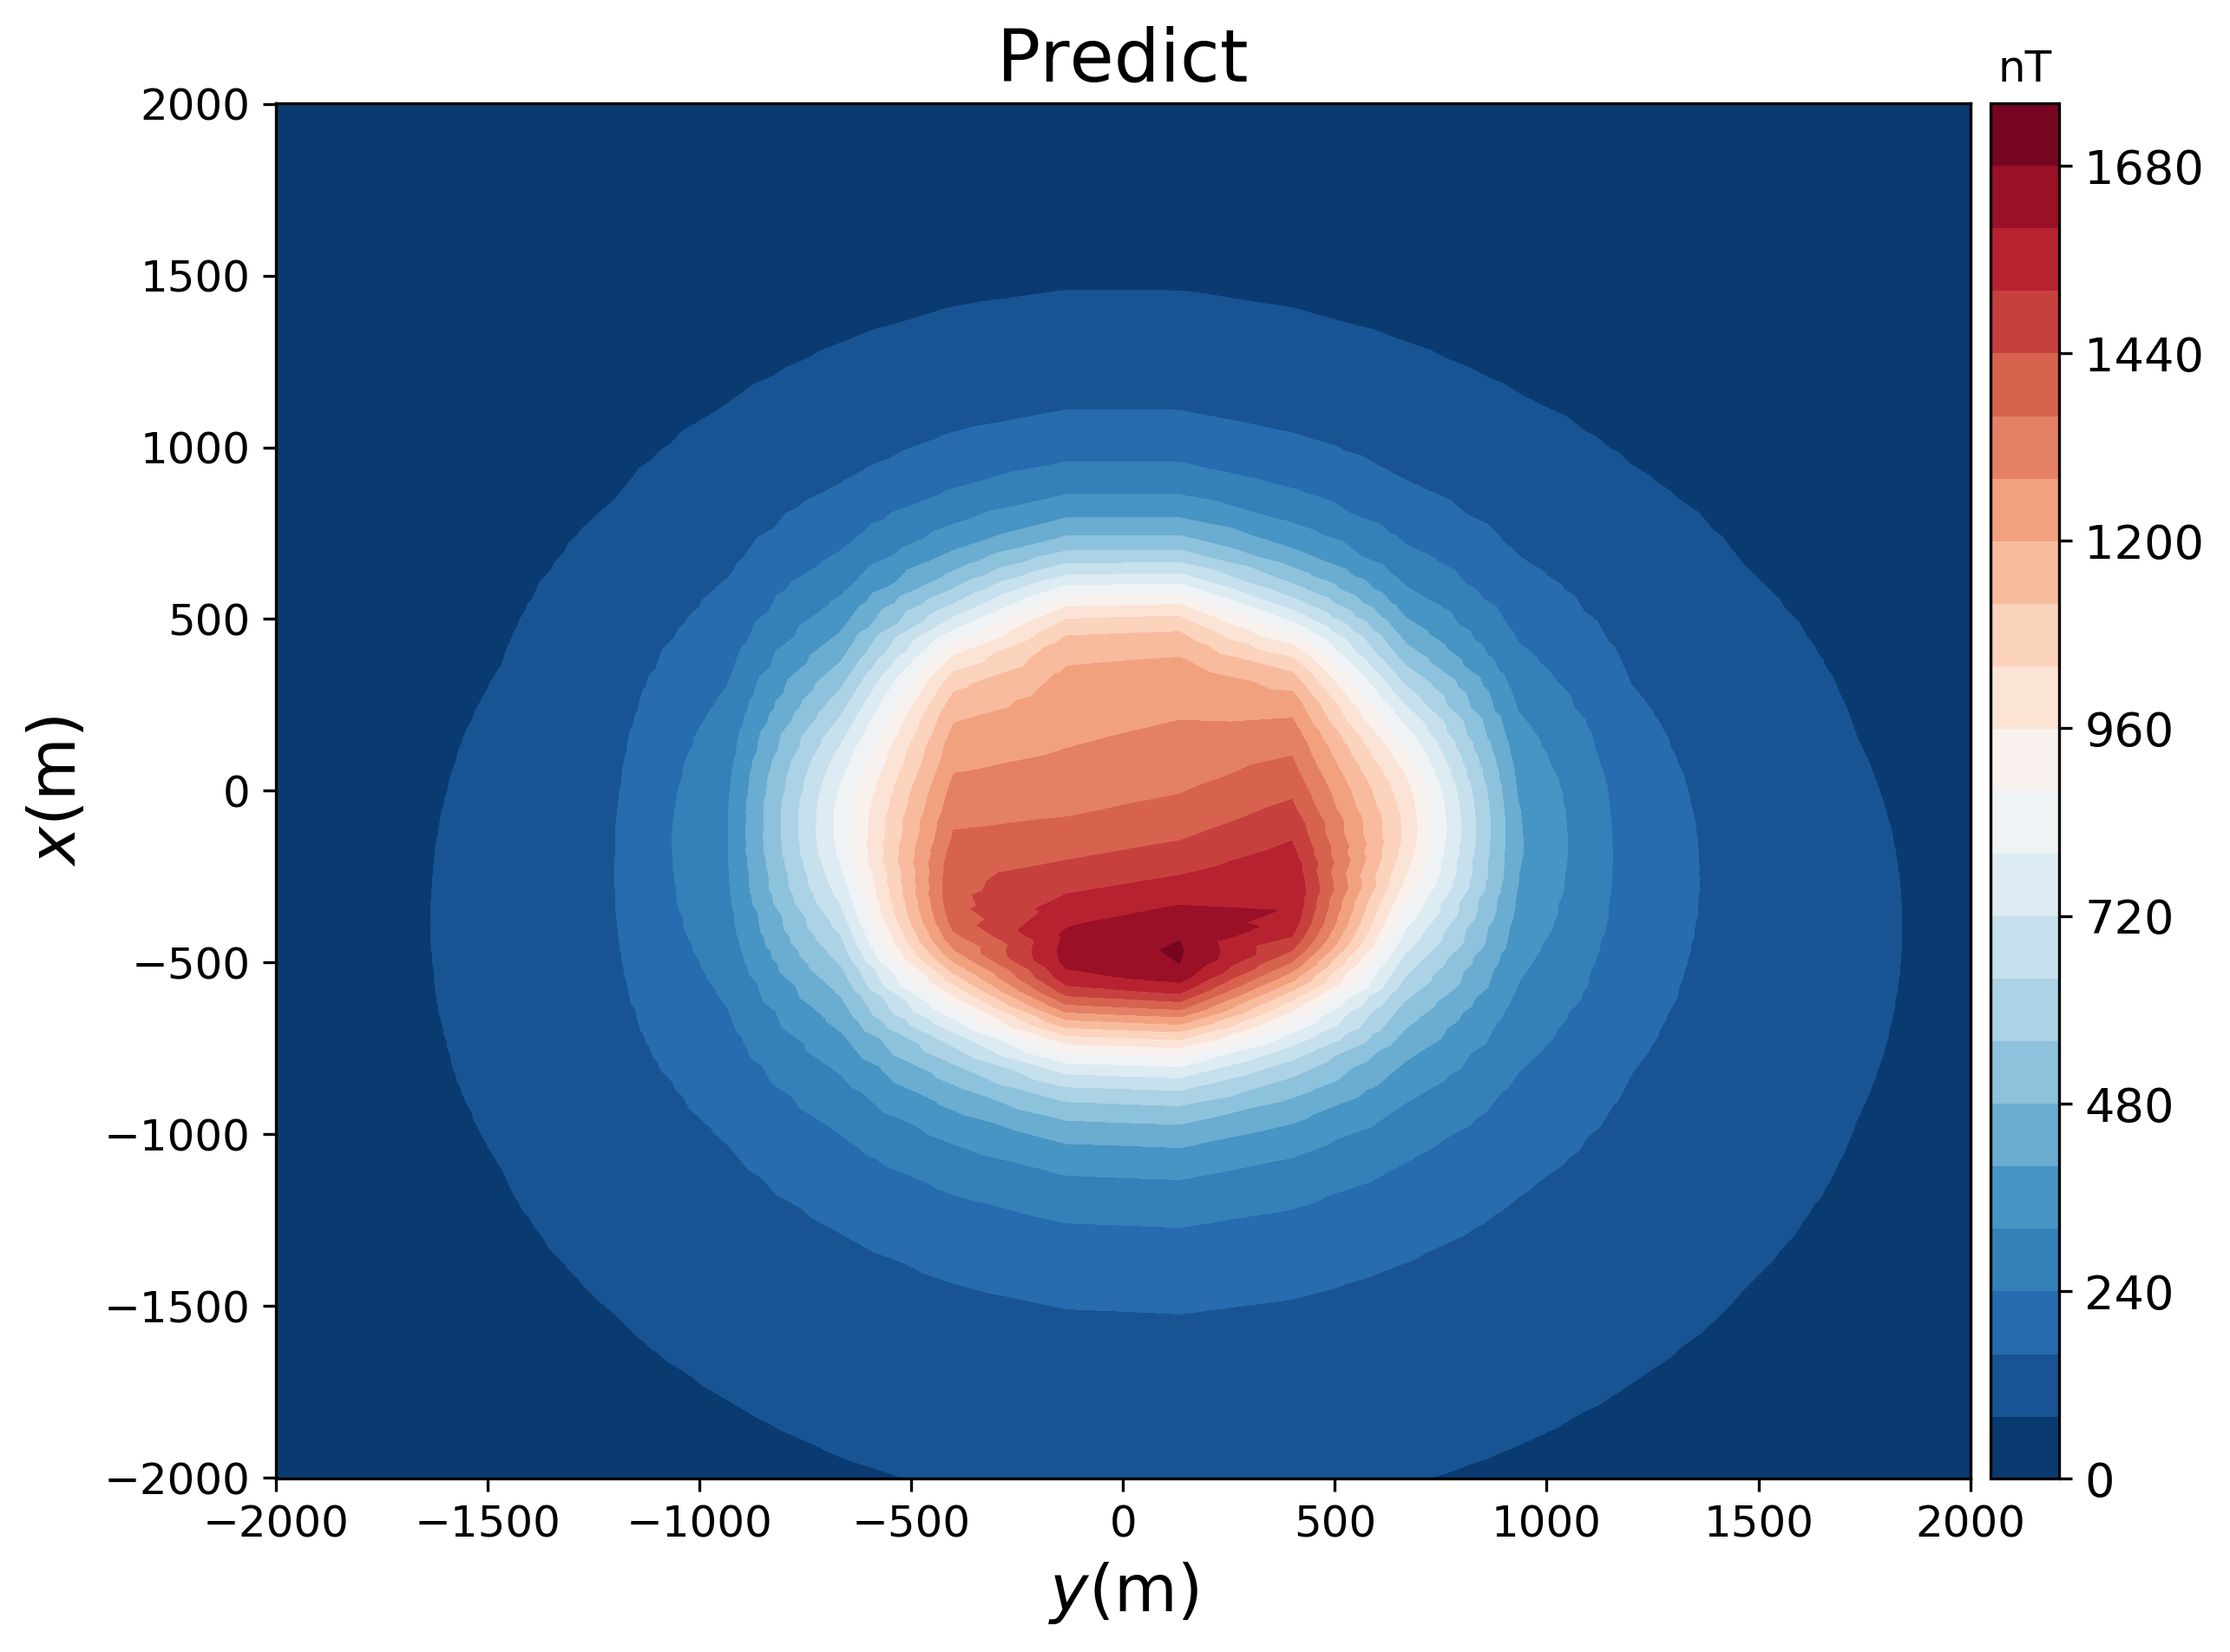

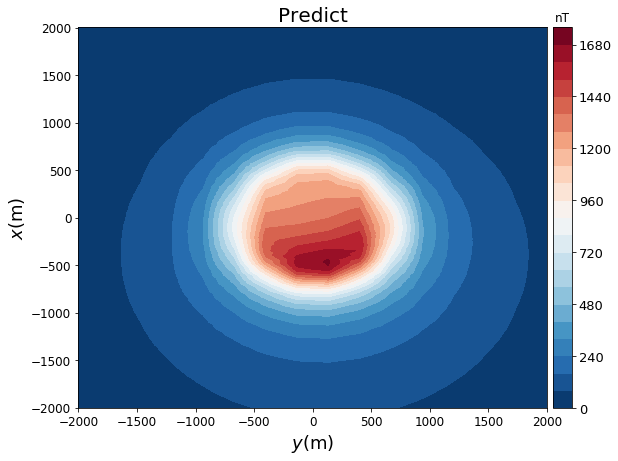

In [59]:
plt.figure(figsize=(10,7))
plt.title('Predict', fontsize=20)
#norm=mpb.colors.Normalize(vmin=np.min(inversion['data_fit']), vmax=np.min(inversion['data_fit'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['data_fit'], 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
#mpl.m2km()
plt.savefig(mypath+'kimberlite_amf_predict.png', dpi=300, bbox_inches="tight")
#plt.show()
img(filename=mypath+'kimberlite_amf_predict.png', width=1600, height=400)

ValueError: minvalue must be less than or equal to maxvalue

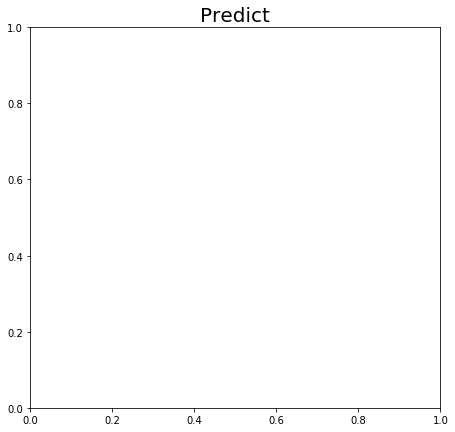

In [60]:
# plot
norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))

plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Predict', fontsize=20)
plt.tricontourf(inversion['y'], inversion['x'], inversion['data_fit'],20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Observed', fontsize=20)
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
#mpl.m2km()
plt.savefig(mypath+'kimberlite_amf_fit.png', dpi=300, bbox_inches="tight")
#plt.show()
img(filename=mypath+'kimberlite_amf_fit.png', width=1600, height=400)

/home/leonardo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


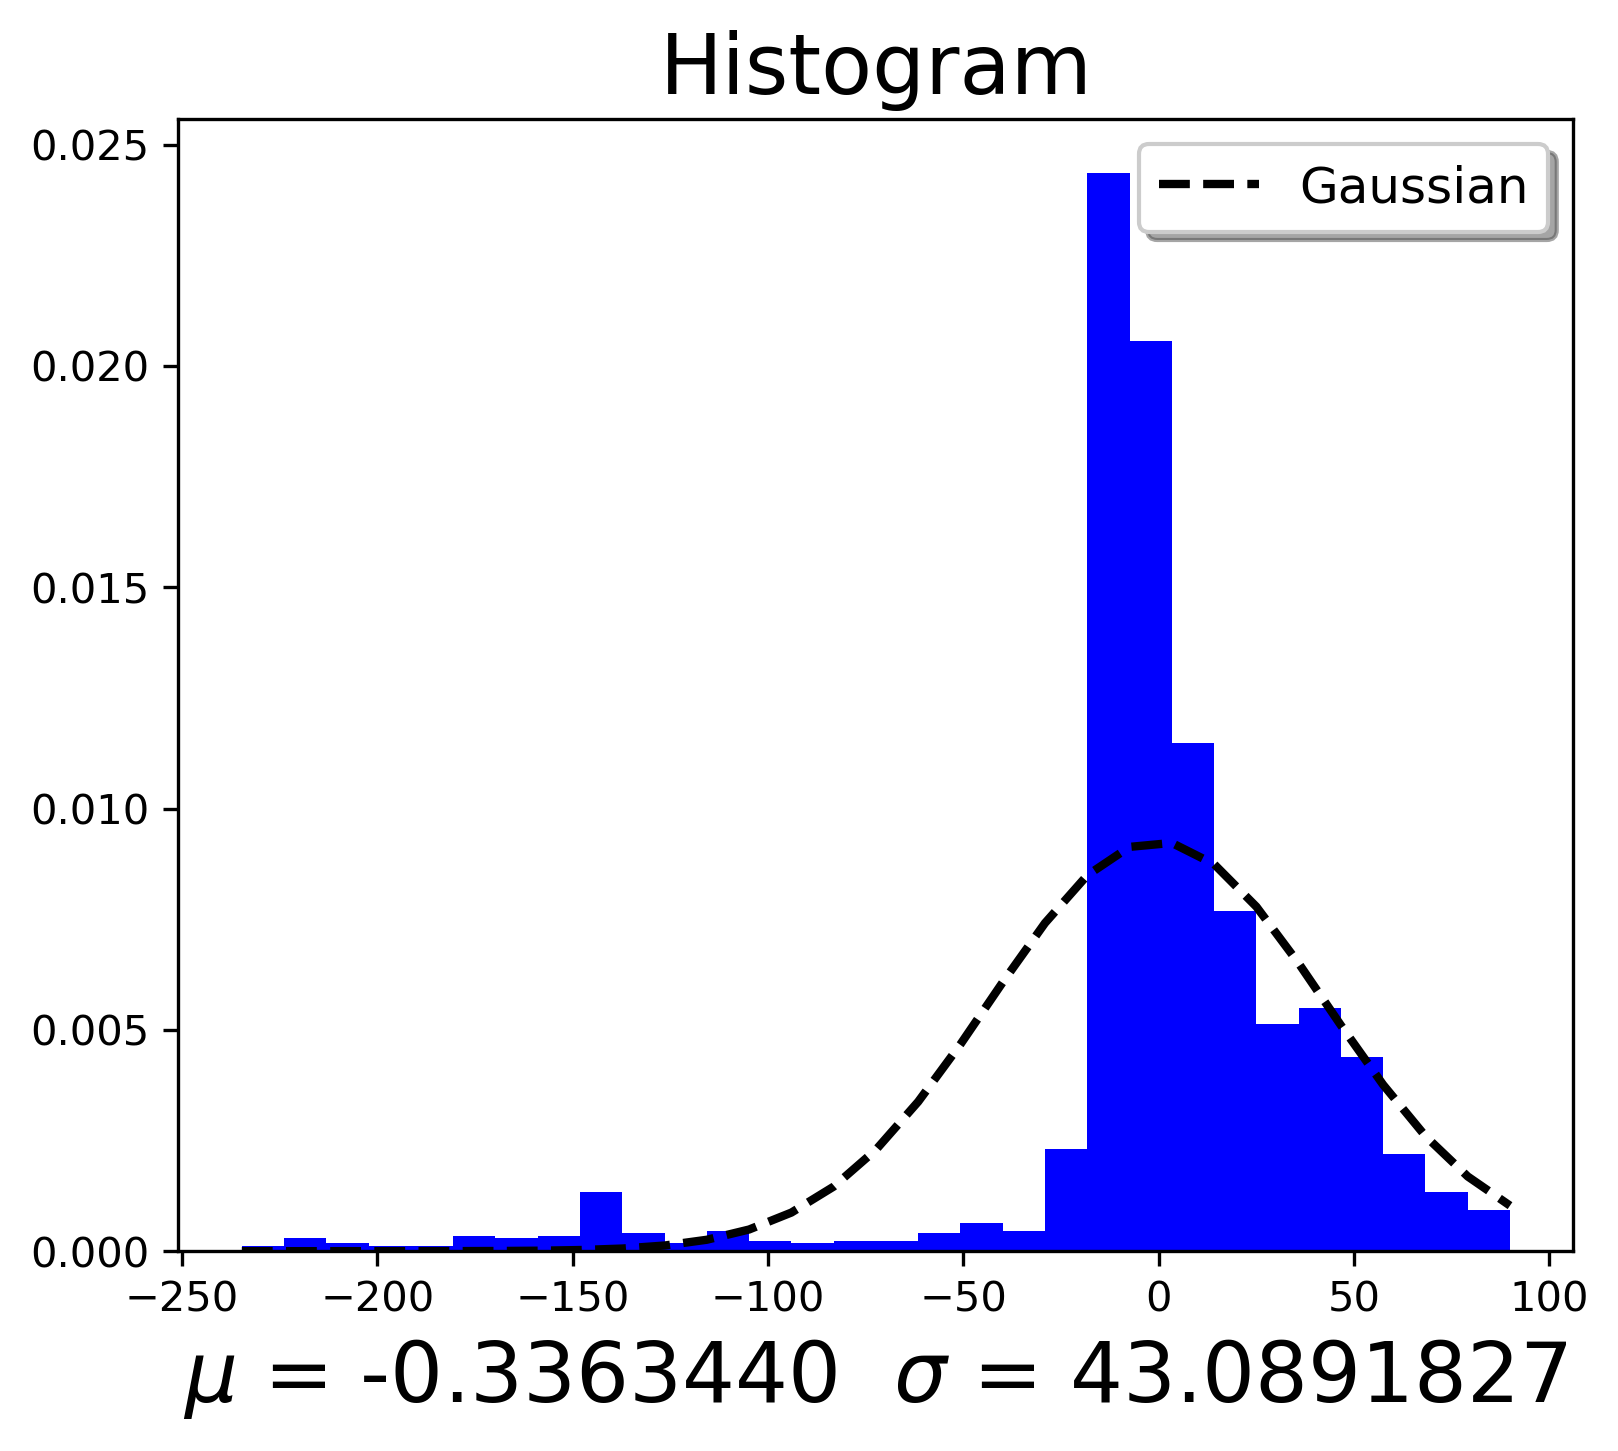

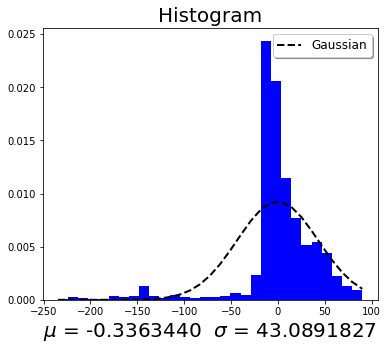

In [61]:
mean = np.mean(inversion['residual'])
std = np.std(inversion['residual'])
plt.figure(figsize=(6,5))
plt.title('Histogram', fontsize = 20)
plt.xlabel('$\mu$ = %.7f  $\sigma$ = %.7f' % (mean, std), fontsize=20)
#nbins = int((np.max(inversion['residual_norm']) - np.min(inversion['residual_norm'])))
nbins=30
n, bins, patches = plt.hist(inversion['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=2., label='Gaussian')
#plt.ylim(0.,0.5)
#plt.xlim(-10., 10.)
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_amf_hist.png', dpi=300, bbox_inches="tight")
#plt.show()

img(filename=mypath+'kimberlite_amf_hist.png', width=400, height=400)

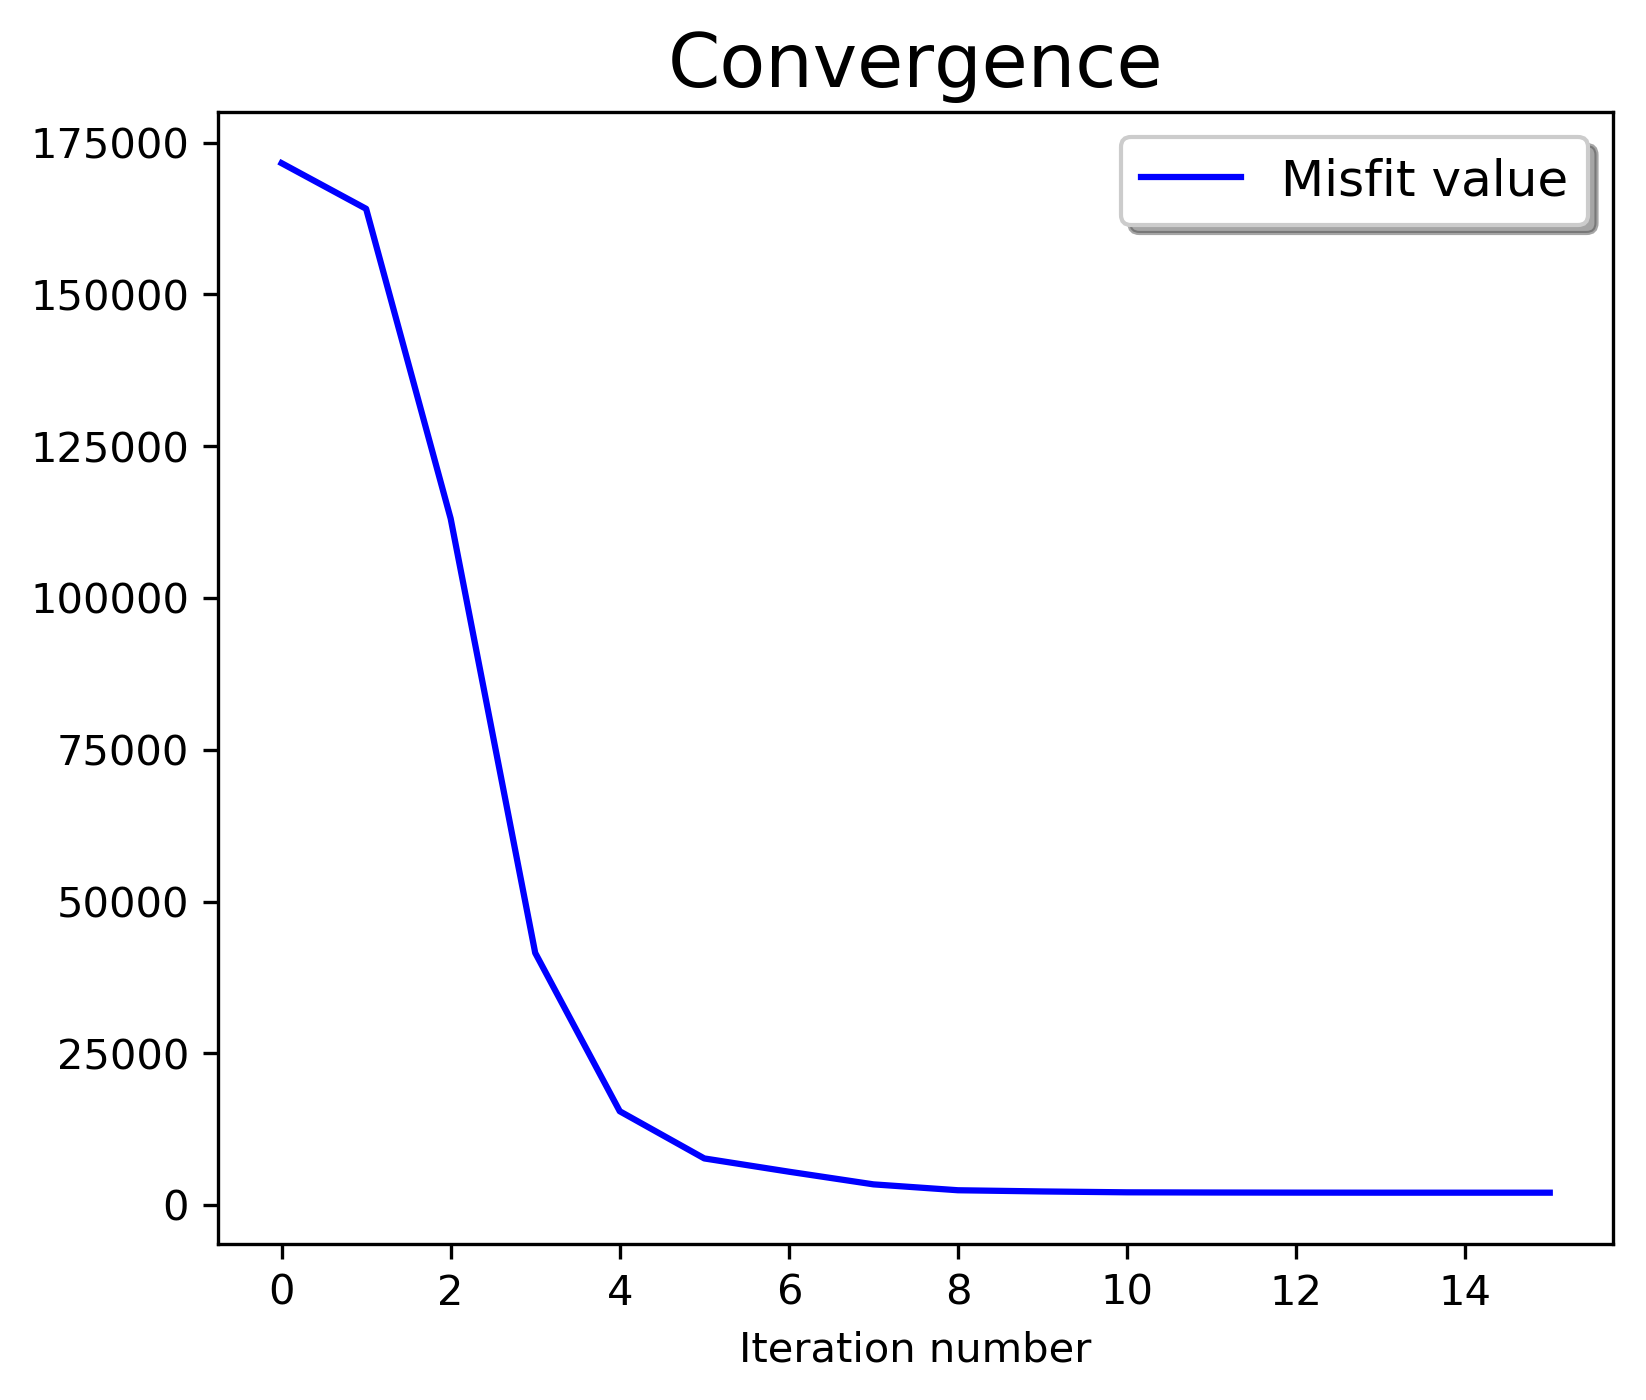

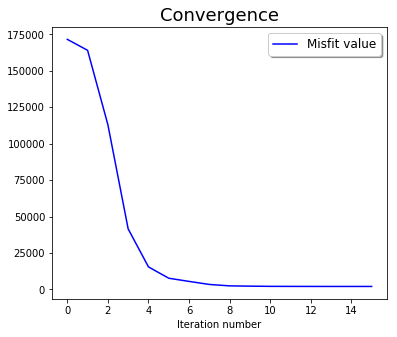

In [62]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(inversion['objective'], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.savefig(mypath+'kimberlite_amf_convergence.png', dpi=300, bbox_inches="tight")
#plt.show()

img(filename=mypath+'kimberlite_amf_convergence.png', width=400, height=400)

In [63]:
verts = mfun.plot_prisms(inversion['prisms'])
verts_true = mfun.plot_prisms(model['prisms'])

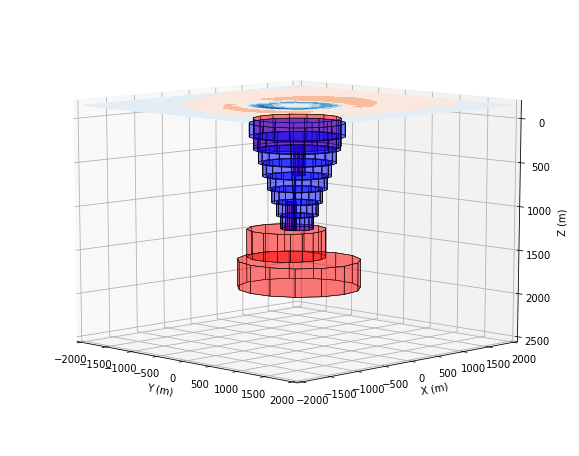

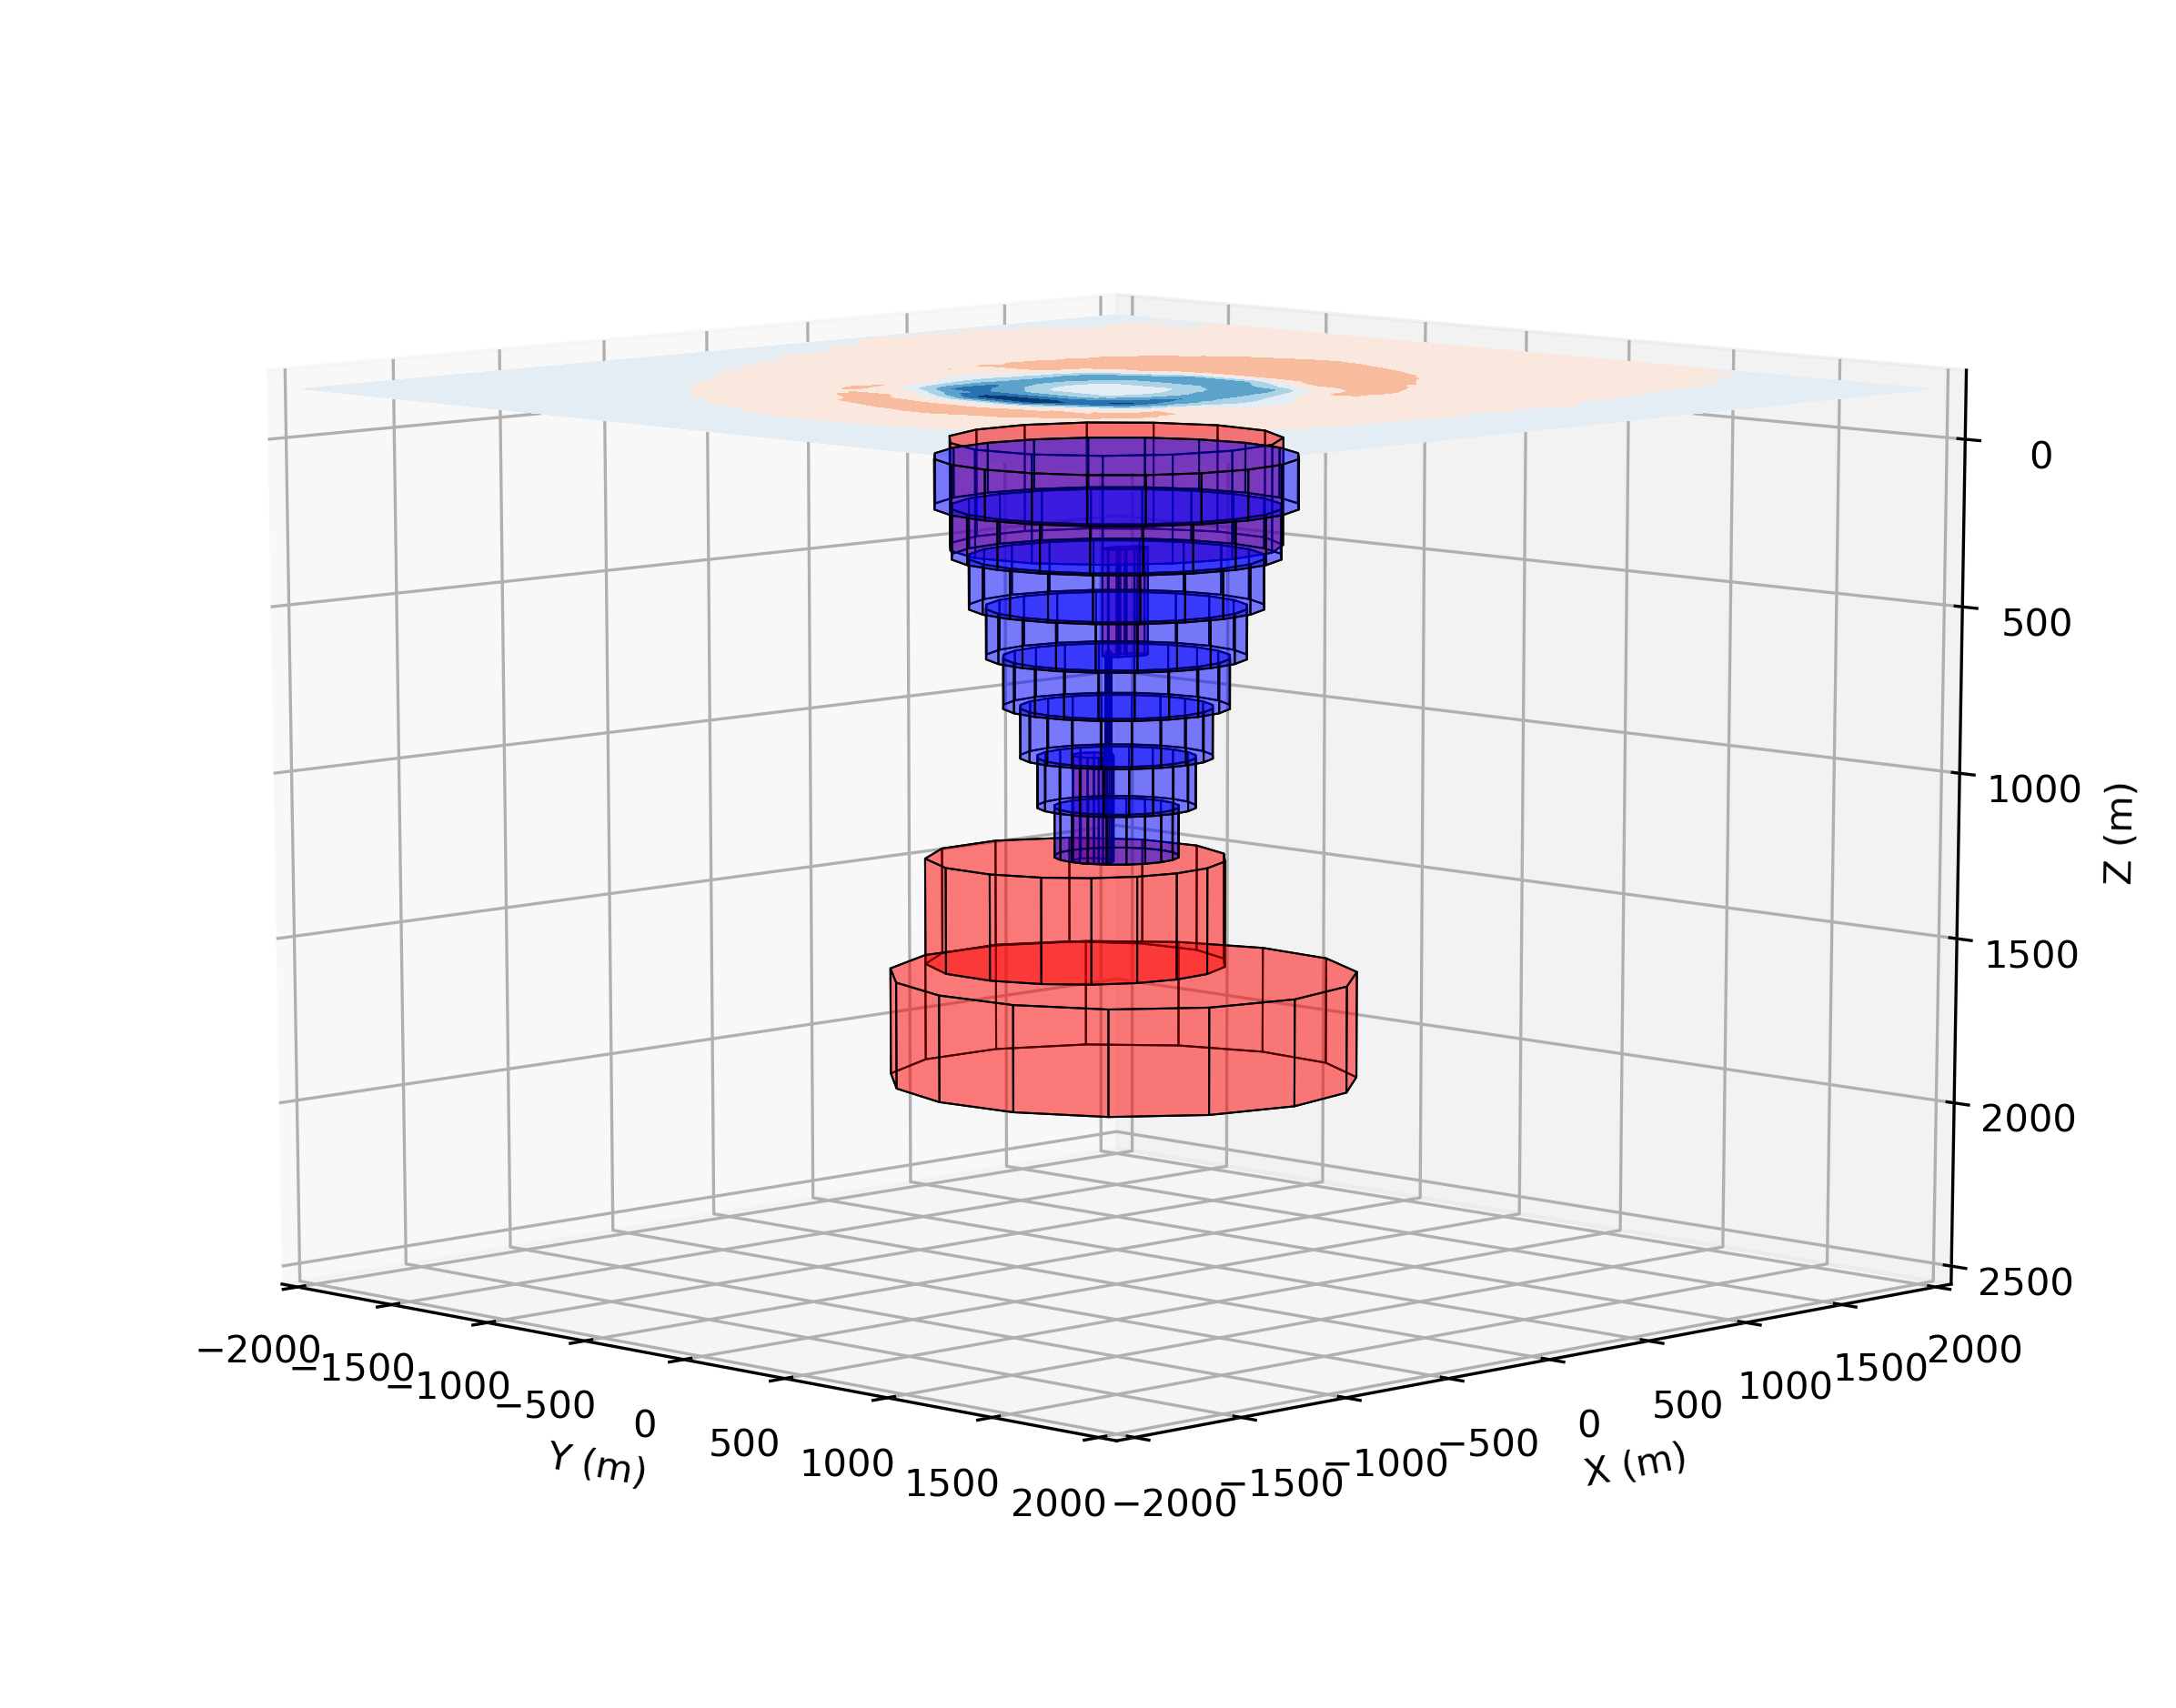

In [64]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-2000, 2000, 100)
ax.set_ylim(-2000, 2000, 100)
ax.set_zlim(2500, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -45)

norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'kimberlite_amf_3d_estimate.png', dpi=300, bbox_inches="tight")
plt.show()

img(filename=mypath+'kimberlite_amf_3d_estimate.png', width=400, height=400)

In [65]:
bounds = [-1000., 1000., -1000., 1000., -100., 2000.]
red, green, blue = (1, 0, 0), (0, 1, 0), (0, 0, 1)
white, black = (1, 1, 1), (0, 0, 0)

# Show the model
scene = myv.figure(size=(500,400))
myv.polyprisms(model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=.5, edges=False)
myv.polyprisms(inversion['prisms'], 'magnetization', color=red, linewidth=1., opacity=1.)

ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.8
ax.axes.label_format = '%-#.1f'

scene.scene.camera.position = [-1210.0445213155442, -6670.9682614114663, 359.47037872353184]
scene.scene.camera.focal_point = [1.51112325816375e-12, 4.5333697744912496e-12, 950.00000000000205]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.036819949950466738, 0.081488938214263576, -0.99599389768931668]
scene.scene.camera.clipping_range = [4251.6348306369673, 10036.692106092029]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)
#myv.title('bolacha', color=(0, 0, 0), size=1.3, height=0.5)
myv.savefig(mypath+'kimberlite_amf_bolacha0.png')
myv.show()

In [ ]:
# Show the model
scene = myv.figure(size=(500,400))
myv.polyprisms(model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=1., edges=False)
myv.polyprisms(inversion['initial_estimate'], 'magnetization', color=red, linewidth=1., opacity=.4)

ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.8
ax.axes.label_format = '%-#.1f'

scene.scene.camera.position = [-1210.0445213155442, -6670.9682614114663, 359.47037872353184]
scene.scene.camera.focal_point = [1.51112325816375e-12, 4.5333697744912496e-12, 950.00000000000205]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.036819949950466738, 0.081488938214263576, -0.99599389768931668]
scene.scene.camera.clipping_range = [4251.6348306369673, 10036.692106092029]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)
#myv.title('bolacha', color=(0, 0, 0), size=1.3, height=0.5)
myv.savefig(mypath+'kimberlite_amf_bolacha_inicial.png')
myv.show()

In [ ]:
# Show the model
scene = myv.figure(size=(500,400))
myv.polyprisms(model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=1., edges=False)

ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.8
ax.axes.label_format = '%-#.1f'

scene.scene.camera.position = [-1210.0445213155442, -6670.9682614114663, 359.47037872353184]
scene.scene.camera.focal_point = [1.51112325816375e-12, 4.5333697744912496e-12, 950.00000000000205]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.036819949950466738, 0.081488938214263576, -0.99599389768931668]
scene.scene.camera.clipping_range = [4251.6348306369673, 10036.692106092029]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)
#myv.title('bolacha', color=(0, 0, 0), size=1.3, height=0.5)
myv.savefig(mypath+'kimberlite_amf_bolacha_true.png')
myv.show()

In [ ]:
# calculate the momentum

volume = 0.
momentum = 0.
for bolacha in model['prisms']:
    area = mfun.area_polygon(bolacha.x, bolacha.y)
    volume += area*(bolacha.z2 - bolacha.z1)
    momentum += volume*model['intensity']
    
momentum

In [ ]:
volume = 0.
momentum = 0.
for bolacha in inversion['prisms']:
    area = mfun.area_polygon(bolacha.x, bolacha.y)
    volume += area*(bolacha.z2 - bolacha.z1)
    momentum += volume*np.linalg.norm(bolacha.props['magnetization'])
    
momentum